# การวิเคราะห์ข้อมูล Titanic และการสร้างโมเดลทำนายการรอดชีวิต
วัตถุประสงค์เพื่อทำนายการรอดชีวิตของผู้โดยสาร โดยใช้โมเดล Decision Tree และ Random Forest

## 1. (Import Lib and Load Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId: รหัสผู้โดยสาร
Survived: การรอดชีวิต (0 = ไม่รอด, 1 = รอด)
Pclass: ชั้นที่นั่ง (1 = ชั้น 1, 2 = ชั้น 2, 3 = ชั้น 3)
Name: ชื่อผู้โดยสาร
Sex: เพศ
Age: อายุ
SibSp: จำนวนพี่น้อง/คู่สมรสที่เดินทางมาด้วย
Parch: จำนวนบิดามารดา/ลูกที่เดินทางมาด้วย
Ticket: หมายเลขตั๋ว
Fare: ค่าโดยสาร
Cabin: หมายเลขห้องพัก
Embarked: ท่าเรือที่ขึ้น (C = Cherbourg, Q = Queenstown, S = Southampton)

## 2.(Exploratory Data Analysis - EDA)

เราจะตรวจสอบโครงสร้างของข้อมูลและค่าที่หายไป (Missing Values)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.1 การวิเคราะห์ตัวแปรเดี่ยว (Univariate Analysis)

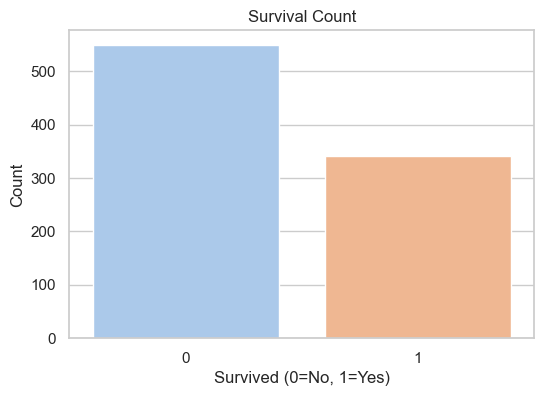

In [5]:
# กราฟแสดงจำนวนผู้รอดชีวิตและผู้เสียชีวิต
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Survival Count')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

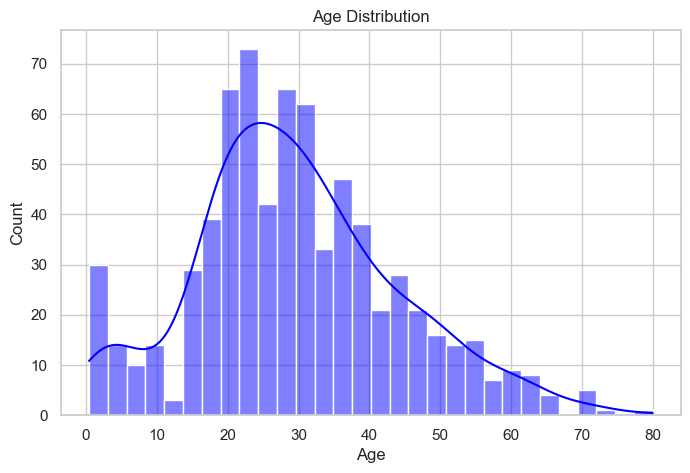

In [6]:
# กราฟแสดงการกระจายตัวของอายุ
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

### 2.2 การวิเคราะห์ความสัมพันธ์ (Bivariate Analysis)

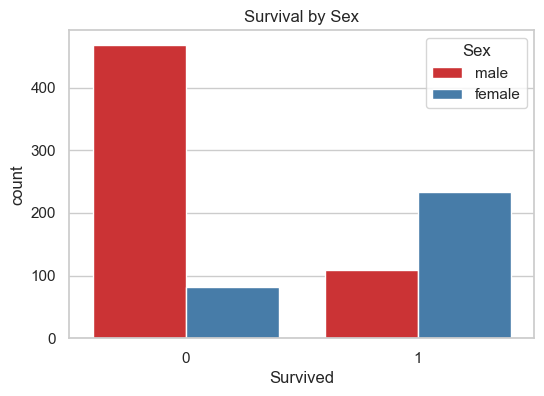

In [7]:
# กราฟแสดงการรอดชีวิตแยกตามเพศ
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set1')
plt.title('Survival by Sex')
plt.show()

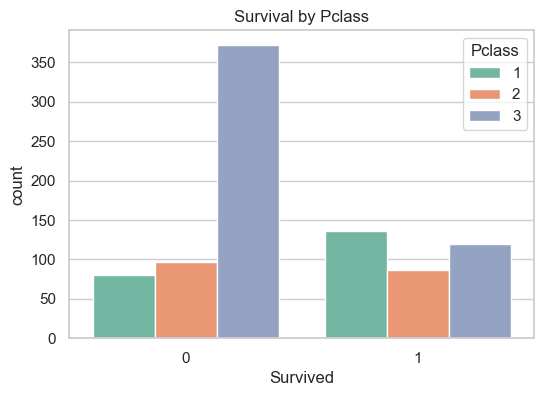

In [8]:
# กราฟแสดงการรอดชีวิตแยกตามชั้นที่นั่ง (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set2')
plt.title('Survival by Pclass')
plt.show()

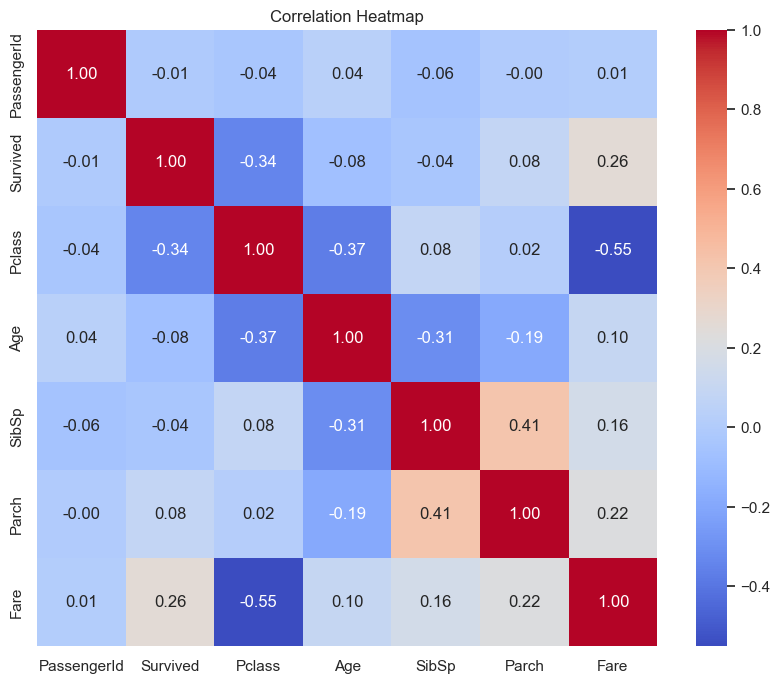

In [9]:
# กราฟ Heatmap แสดงความสัมพันธ์ระหว่างตัวแปร (Correlation Matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 3. การเตรียมข้อมูล (Data Preprocessing)

### 3.1 การจัดการค่าที่หายไป (Handling Missing Values)

In [10]:

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

แทนค่า Age ที่หายไปด้วย Median, 
แทนค่า Embarked ที่หายไปด้วย Mode, 
แทนค่า Cabin ที่หายไปด้วยค่าที่บ่อยที่สุด


*** จะทำให้ null value ใน data frame หายไป ***

### 3.2 การแปลงข้อมูลเป็นตัวเลข
- แปลง **Sex** และ **Embarked** ให้เป็นตัวเลข 
- ตัดคอลัมน์ที่ไม่จำเป็นสำหรับการทำนายออก เช่น PassengerId, Name, Ticket

In [11]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features] #feautes 
y = df['Survived'] #survied 0,1

X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


## 4. การแบ่งข้อมูล (Data Splitting)
แบ่งข้อมูล Training Set 80% และ Testing Set 20% 
*** random_state = 42 ใส่ parameter นี้เพื้่อป้องกันการรันแล้วมีผลต่อการสุ่มในครั้งถัดไปจะมีค่าไม่เท่าเดิม ***


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (712, 7)
Testing set shape: (179, 7)


## 5. การสร้างและเทรนโมเดล (Model Training)

### 5.1 Decision Tree Classifier

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



#ความแม่นยำอยู่ที่ 0.79 (79%)

เก่งทายคนตาย (Class 0): precision การระบุความแม่นยำของโมเดลในการทำนายอยู่ที่ 83%

กากทายคนรอด (Class 1): precision การระบุความแม่นยำของโมเดลในการทำนายอยู่ที่ 76%

จากการแบ่ง DATA เทส 179 คนสรุปได้ว่า 

มีคนตาย 105 

มีคนรอด 74

### 5.2 Random Forest Classifier

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



จากที่สังเกตุตอนเรียกฟังก์ชัน Random Forest จะมี parameter เพิ่มเติมขึ้นมา 2 ตัวคือ n_estimators และ max_depth

n_estimators คือ จำนวนต้น decision tree ที่จะสร้างขึ้นมา

max_depth คือ ความลึกของต้น decision tree เพื่อป้องกัน overfitting หรือพูดบ้านๆคือเน้นจำแต่ไม่เน้นเข้าใจไปเวย์รู้มาก

#ความแม่นยำอยู่ที่ 0.83 (83%)

เก่งทายคนตาย (Class 0): precision การระบุความแม่นยำของโมเดลในการทำนายอยู่ที่ 83%

เก่งทายคนรอด (Class 1): precision การระบุความแม่นยำของโมเดลในการทำนายอยู่ที่ 82%

ต่างกันแค่ 1 % 

จากการแบ่ง DATA เทส 179 คนสรุปได้ว่า 

มีคนตาย 105 

มีคนรอด 74

## 6. สรุปผล (Conclusion)

จากการเปรียบเทียบผลลัพธ์ระหว่าง Decision Tree และ Random Forest จะเห็นได้ว่า...

### Decision Tree (ต้นไม้ต้นเดียว):
 เหมือนเราเดินไปถาม "ผู้เชี่ยวชาญคนเดียว"

ถ้าคนนี้เก่ง ก็รอดไป

แต่ถ้าคนนี้มีอคติ (Bias) หรือจำข้อมูลผิด เราก็ผิดตามไปด้วย

### Random Forest (n_estimators):

 เหมือนเราเดินไปถาม "คน 100 คน" (ถ้า n_estimators=100)แต่ละคนมีความรู้ต่างกันนิดหน่อย (เพราะสุ่มข้อมูลไปสอนไม่เหมือนกัน) 
 
 สุดท้ายเราใช้วิธี "โหวตเสียงข้างมาก" (Majority Vote)    
